# <font color='#d35400'> Lab 7 | Dimensionality Reduction & Unsupervised Machine Learning </font>
Welcome to Lab 7! This lab analyzes 63,542 emails. We convert these emails into raw text using a feature matrix of a "bag of words" model. Each column of the feature matrix corresponds to one word, each row corresponds to one email, and the entry stores the number of times that word was found in the email. 

<p align="center">
  <img src="coffee_dog.jpg" alt="Alt Text", width="300"/>
</p>

## <font color = '#FF8C00'> Section 1 </font> | Data Loading
In this section, we load a dataset of emails that are stored as individual JSON files within a directory called "email json". Each file follows the naming format "message XXXXX.json". The goal is to write a python script that locates and loads all JSON files, parsing them into a list of dictionaries. The list is then converted into a Pandas Dataframe.

- [x] Extract the provided email json.zip ﬁle. It should create a directory called “email json”. Each email is stored as a separate JSON document with a name in the format “message XXXXX.json”.
- [x] Remember when I introduced the Titanic data set in the ﬁrst lab and I asked the class to import the ﬁle by hand? That practice will pay oﬀ here. Write some code to ﬁnd and load all of the JSON documents. You should have a list of dicts when done (Hint: Review the built-in Python json library).
- [x] Convert the list of dicts into a Pandas DataFrame. The DataFrame should have 5 columns and 63,452 rows (Hint: use the DataFrame.from records() or DataFrame.from dict() functions).

### <font color = '#FF8C00'> Extracting the Zip File </font>
We start off by extracting the zip file. We then store the `.json` files in a directory named `email_json`. We know that the JSON files come with a name in the format `messageXXXXX.json`.

In [1]:
# importing the os library
import os

# listing out the files in the directory
directory = r"C:\GitHub\DataScienceMachineLearning\wk_09\lab\email_json"
files = os.listdir(directory)
print(files[0])

message_00000.json


### <font color = '#FF8C00'> Loading the JSON Documents </font>
Next, we load all the JSON documents and produce a list of dicts using the Python JSON library. We achieve this by going into every JSON document and parsing them into a dictionary.

In [2]:
# importing the json library
import json

# importing the tqdm library
from tqdm import tqdm

# setting up the dictionary
email_dictionary = []

for filename in tqdm(files):
    file_path = os.path.join("email_json", filename)
    with open(file_path, 'r') as file:
        email_contents = json.load(file)
        email_dictionary.append(email_contents)

100%|██████████| 63542/63542 [00:49<00:00, 1283.09it/s]


### <font color = '#FF8C00'> Creating a Pandas Dictionary </font>
We now convert the list of dictionaries into a pandas data frame. The data frame is expected to have 5 columns and 63,452 rows. We achieve this using `DataFrame.fromrecords()` and `DataFrame.fromdict()`.

In [3]:
# importing the pandas library
import pandas as pd

# importing the ipython display
from IPython.display import display

# converting the dictionary into a data frame
email_df = pd.DataFrame.from_records(email_dictionary)

# confirming the shape of the data frame
display(email_df.shape)


(63542, 5)

In [4]:
# getting the description out of the data frame
display(email_df.describe())

# getting the information out of the data frame
display(email_df.info())

,category,to_address,from_address,subject,body
count,63542,63141,63542,63410,63542
unique,2,6284,41150,30671,47626
top,spam,samba-cvs@samba.org,<alert@broadcast.shareholder.com>,Re:,
freq,40450,2384,756,1475,1952


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63542 entries, 0 to 63541
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      63542 non-null  object
 1   to_address    63141 non-null  object
 2   from_address  63542 non-null  object
 3   subject       63410 non-null  object
 4   body          63542 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB


None

## <font color = '#FF8C00'> Section 2 </font> | Extracting the Features
In this section, we prepare the email message bodies for analysis. We do this by converting the raw text into a numerical format using a feature matrix. To achieve this, we use `Scikit-learn`'s `CountVectorizer` which records only the presence or absence of a word.

- [x] Use Scikit Learn’s CountVectorizer class with the binary=True ﬂag to create a feature matrix from the message bodies. When doing this set min df=10 to exclude any words that do not appear in at least 10 emails. The “bodies” column of the DataFrame can be used as a list of strings and passed directly into the ﬁt transform() method of the
CountVectorizer.


### <font color = '#FF8C00'> Preparation for Analysis </font>
Here, we extract the email message bodies to process the text data and convert it into a numerical format. What we end up getting is a matrix of 1's and 0's, where each row represents an email and each column represents a word.

In [5]:
# importing count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# creating a count vectorizer object
count_vectorizer = CountVectorizer(binary=True, min_df=10)

# using fit_transform to create a feature matrix
feature_matrix = count_vectorizer.fit_transform(email_df['body'])

### <font color = '#FF8C00'> Visualizing Feature Matrix </font>
Lastly, we would like to check out the feature matrix. We do this by converting it into a Pandas data frame. This just allows us to visualize and check if what we're doing is right.

In [6]:
# visualizing the feature matrix
features = count_vectorizer.get_feature_names_out()
feature_df = pd.DataFrame(feature_matrix.toarray(), columns=features)
display(feature_df)

,00,000,0000,00000,000000,0000000,00000000,000000000,000000t0000z,0000f4,...,для,из,изготовление,информацию,курьера,макета,мы,на,по,信纸
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color = '#FF8C00'> Section 3 </font> | Dimensionality Reduction / Visualization
We now focus on reduce the dimensionality of the large feature matrix, we use `TruncatedSVD` from Scikit-learn with the `fit_transform()` function to create a new matrix with 10 components. We then plot the explained variance ratios of these components and create a scatter plot using the two components and a second scatter plot where the points are colored based on the category.

- [x] This matrix has too much information to be directly useful. Use the ﬁt transform() function of Scikit Learn’s TruncatedSVD class to transform the original feature matrix into a new feature matrix with 10 columns (variables or components). Scikit Learn’s TruncatedSVD method is similar to its PCA method, but it works with sparse matrices.
- [x] Plot the explained variance ratios of the components (Hint: use the explained variance ratio property of the TruncatedSVD class)
- [x] Create a scatter plot using the two components with the highest explained variance ratios (Hint: plt.scatter(proj matrix[:, i], proj matrix[:, j])).
- [x] Create a second scatter plot using the same two components. This time, color the points based on the category column of the DataFrame. All spam messages should be one color; all ham messages should be a second color.

### <font color = '#FF8C00'> Converting the Feature Matrix </font>
The current matrix we have has too much information to be useful. We use `fit_transform()` that comes from Scikit Learn's `TruncatedSVD` class to transform the original feature matrix into a new one with 10 columns.

In [7]:
# importing the TruncatedSVD library and standard scaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# initializing the TruncatedSVD object
svd = TruncatedSVD(n_components=10)

# importing the standard scaler
scaler = StandardScaler()

# applying fit_transform to reduce the feature matrix to 10 components
svd_10 = svd.fit_transform(feature_matrix)
svd_10 = scaler.fit_transform(svd_10)

### <font color = '#FF8C00'> Plotting Explained Variance </font>
Next, we plot the explained variance ratios of the components. We use the `explained_variance_ratio_property` of the TruncatedSVD class. 

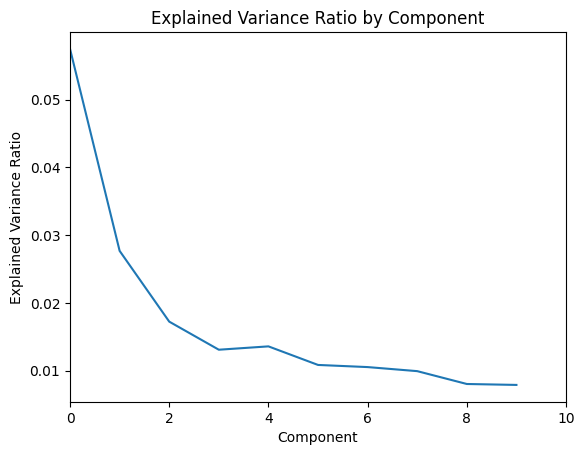

In [8]:
# importing the matplotlib library
import matplotlib.pyplot as plt

# plotting the plot using explained variance
plt.plot(svd.explained_variance_ratio_)
plt.title("Explained Variance Ratio by Component")

# labeling the x and y axes
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")

# setting the limits from 0 to 10
plt.xlim(0, 10)

# saving the plot
plt.savefig(r'C:\GitHub\DataScienceMachineLearning\wk_09\plots\ExplainedVarianceRatio.png', dpi=300)

# graphing out the plot
plt.show()

### <font color = '#FF8C00'> Plotting the First Scatter Plot </font>
Next, we create a scatter plot using the two components with the highest explained variance ratios. We use example code such as `plt.scatter(proj_matrix[:,i], proj_matrix[:,j])`.


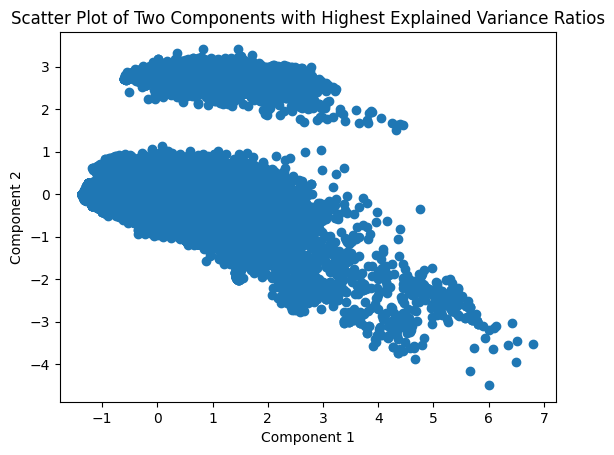

In [9]:
# plotting the scatter plot using the two components
plt.scatter(svd_10[:, 0], svd_10[:,1])

# setting the title, x any y axis labels
plt.title("Scatter Plot of Two Components with Highest Explained Variance Ratios")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# saving the plot
plt.savefig(r'C:\GitHub\DataScienceMachineLearning\wk_09\plots\ScatterPlot.png', dpi=300)

# displaying the plot
plt.show()

### <font color = '#FF8C00'> Plotting the Second Scatter Plot </font>
Finally, we create a second scatter plot using the same two components. We color the points based on the category column of the DataFrame. The spam messages should be one color; the ham messages should be a second color.

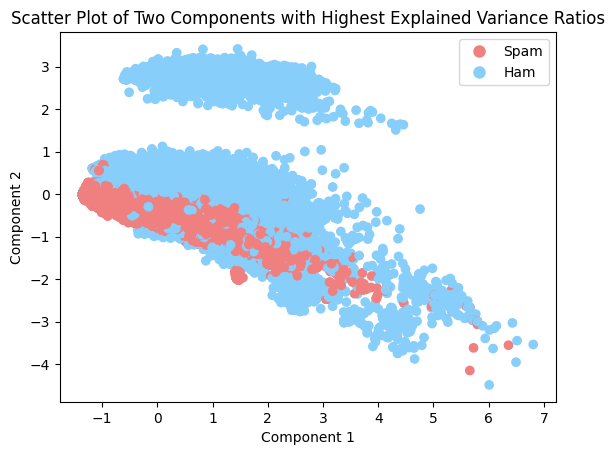

In [10]:
# setting up the coloring 
coloring = email_df['category'].map({'spam':'lightcoral', 'ham':'lightskyblue'})

# plotting the scatter plot using the two components
plt.scatter(svd_10[:, 0], svd_10[:,1], c=coloring, marker='o')

# setting the title, x any y axis labels
plt.title("Scatter Plot of Two Components with Highest Explained Variance Ratios")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# manually creating legend and and labels for spam
spam_handle = plt.Line2D([0], [0], marker='o', color='w', label='Spam',
                          markerfacecolor='lightcoral', markersize=10)

# manually creating legend and and labels for ham
ham_handle = plt.Line2D([0], [0], marker='o', color='w', label='Ham', 
                        markerfacecolor='lightskyblue', markersize=10)

# setting up the legend
plt.legend(handles=[spam_handle, ham_handle])

# saving the plot
plt.savefig(r'C:\GitHub\DataScienceMachineLearning\wk_09\plots\ScatterPlotColored.png', dpi=300)

# displaying the plot
plt.show()

## <font color = '#FF8C00'> Section 4 </font> | The Clustering Process
In this section, we perform clustering of emails based on their features, using a suitable clustering algorithm from Scikit-learn. We perform the necessary transformations, such as dimensionality reduction and we cluster the emails based on the top two components with the highest explained variance. The resulting clusters will be visualized in a scatter plot, with points colored by the cluster labels. 

- [x] To perform further analysis, we want to cluster the emails. By clustering the emails, each message will be assigned a cluster id (e.g., 0, 1, 2, etc.). There are numerous clustering algorithms, each with strengths and weaknesses. We cannot cover them all in lecture and so begin this section by reviewing the clustering algorithms available in Scikit Learn. Choose a clustering algorithm that you think would be appropriate for
this data set.
- [x] Cluster the samples using the two SVD components that you determined to have the highest explained ratio AFTER performing any necessary operations to transform them. The clustering algorithm should return a 1D numpy array of cluster labels (e.g., 0, 1, 2, etc.) for each point.
- [x] As in 3.4., create a scatter plot of the two SVD components that you determined to have the highest explained ratio. The clustering algorithm should label the points so that all points in the same cluster have the same cluster id (With two clusters, there should only be two cluster ids). Color the points according to their cluster labels. If the clustering does not look correct, try adjusting the parameters of the clustering algorithm you chose or choose a diﬀerent algorithm.
- [x] Calculate a confusion matrix for the ham / spam labels versus the cluster labels.

## <font color = '#FF8C00'> Centroid Based and Aggloromerative Hierarchial Clustering </font>
We start off by clustering the emails, where each message will be assigned a cluster ID. We choose a clustering algorithm that would be the most appropriate for the data set. We experiment with both centroid based clustering first and then aggloromerative hierarchial clustering.

### <font color = '#FF8C00'> The Centroid Based Clustering Approach </font>
Starting off with the centroid based clustering approach, we cluster the approach using the two SVD components that we have previously determined. The clustering algorithm will then return a 1D numpy array of cluster labels. We will be using k-means, and before we use k-means, we use the silhouette score to determine the best k value.

In [11]:
# importing the silhouette score library and KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# storing all the silhouette scores
silhouette_scores = []

# extracting the top two SVD components
top2 = svd_10[:, [0, 1]] 

# for looping through the different k values to find the perfect one
for k_value in tqdm(range(2, 20)):
    kmeans = KMeans(n_clusters=k_value, random_state=42)
    kmeans.fit(top2)
    score = silhouette_score(top2, kmeans.labels_)
    silhouette_scores.append(score)

# printing out the silhouette scores
print(silhouette_scores)

100%|██████████| 18/18 [16:51<00:00, 56.20s/it]

[np.float64(0.3818019648059574), np.float64(0.5147707806223464), np.float64(0.5050849512229185), np.float64(0.5036387697849696), np.float64(0.44186157161531614), np.float64(0.42266418409573003), np.float64(0.4522918635932484), np.float64(0.46278020769443967), np.float64(0.4530338048783778), np.float64(0.43875955711622455), np.float64(0.4194490155756759), np.float64(0.42799926380520026), np.float64(0.4222117925749073), np.float64(0.42800826616770105), np.float64(0.43266559486261047), np.float64(0.4280179918460103), np.float64(0.42215858731638617), np.float64(0.4246392930795954)]


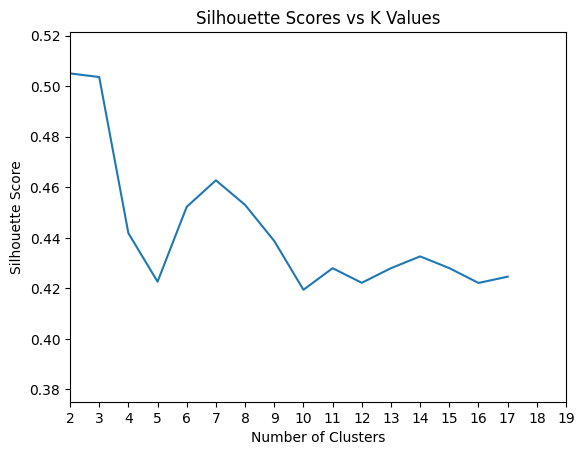

In [12]:
# plotting out the silhouette scores 
plt.plot(silhouette_scores)

# setting the title, x and y labels
plt.title("Silhouette Scores vs K Values")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

# setting the x axis to show only whole numbers
plt.xticks(range(2, 20))
plt.xlim(2, 19)

# saving the plot
plt.savefig(r'C:\GitHub\DataScienceMachineLearning\wk_09\plots\SilhouetteLinePlot.png', dpi=300)

# displaying the plot
plt.show()

### <font color = '#FF8C00'> Retrieving the 1D Numpy Array </font>
After finding the best value for k, we now cluster the samples and then use the clustering algorithms to return a 1D numpy array of cluster labels for each point.

In [13]:
# applying the kmeans clustering with k = 2
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(top2)

# retrieving the cluster labels
cluster_labels = kmeans2.labels_

# printing out the cluster labels
print(cluster_labels)

[1 1 1 ... 0 0 0]


### <font color = '#FF8C00'> Plotting the Centroid Based Scatter Plot </font>
Now, we create a scatter plot of the two SVD components. The clustering algorithm labels the points so that all points in the same cluster have the same cluster ID. We color the points according to their cluster labels. 

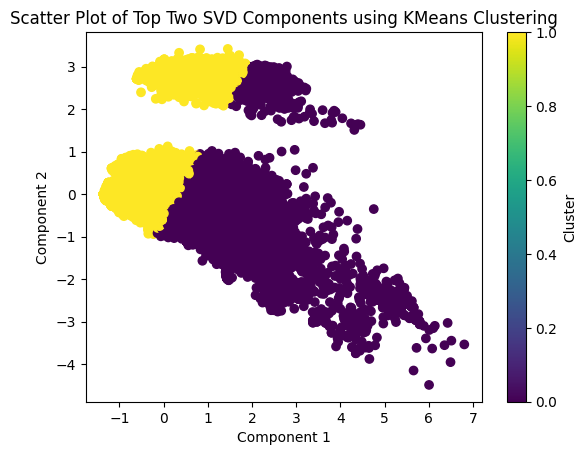

In [14]:
# plotting the scatter plot
plt.scatter(svd_10[:, 0], svd_10[:,1], c=cluster_labels, marker='o')

# plotting the title, x and y labels
plt.title("Scatter Plot of Top Two SVD Components using KMeans Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# displaying the legend
plt.colorbar(label='Cluster')

# saving the plot
plt.savefig(r'C:\GitHub\DataScienceMachineLearning\wk_09\plots\KMeansClustering.png', dpi=300)

# displaying the plot
plt.show()

### <font color = '#FF8C00'> The Aggloromerative Hierarchial Clustering Approach </font>
Starting off with the centroid based clustering approach, we cluster the approach using the two SVD components that we have previously determined. The clustering algorithm will then return a 1D numpy array of cluster labels. We will be using k-means, and before we use k-means, we use the silhouette score to determine the best k value.

In [15]:
# importing the agglormerative clustering approach
from sklearn.cluster import AgglomerativeClustering

# extracting the top two SVD components
top2 = svd_10[:, [0, 1]] 

# building and fitting the clustering model
agglomerative_model = AgglomerativeClustering(n_clusters=2, linkage='single')
agglomerative_model.fit(top2)

# retrieving the cluster labels
agglomerative_labels = agglomerative_model.labels_

# printing out the labels
print(agglomerative_labels)


[0 0 0 ... 0 0 0]


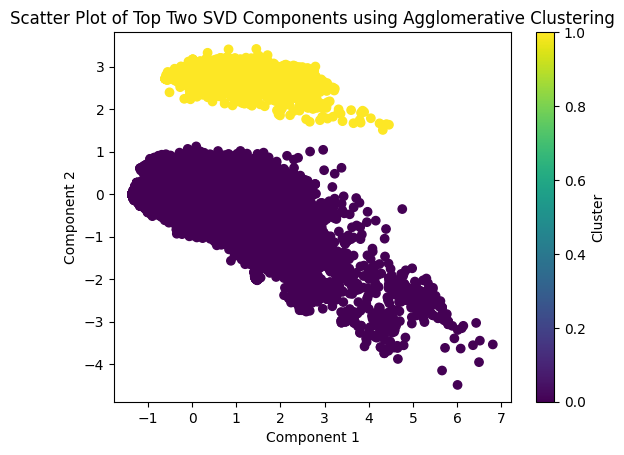

In [16]:
# plotting the scatter plot
plt.scatter(svd_10[:, 0], svd_10[:,1], c=agglomerative_labels, marker='o')

# plotting the title, x and y labels
plt.title("Scatter Plot of Top Two SVD Components using Agglomerative Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# displaying the legend
plt.colorbar(label='Cluster')

# saving the plot
plt.savefig(r'C:\GitHub\DataScienceMachineLearning\wk_09\plots\AgglomerativeClustering.png', dpi=300)

# displaying the plot
plt.show()

### <font color = '#FF8C00'> Creating a Confusion Matrix </font>
Laslty, we generate a confusion matrix to compare the ham / spam labels to the cluster labels using the confusion matrix we have generated. 

Text(0.5, 1.0, 'Confusion Matrix for Agglomerative Clustering')

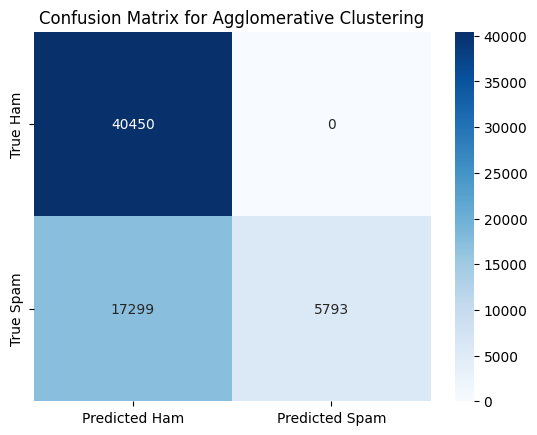

In [17]:
# importing the seaborn and 
import seaborn as sns
from sklearn.metrics import confusion_matrix

# filtering out the ham emails
ham_df = email_df['category'] == 'ham'

# categorizing the ham emails as 1 and spam emails as 0
ham_df_int = ham_df.astype(int)

# creating the confusion matrix
confusion_matrix = confusion_matrix(ham_df_int, agglomerative_labels)

# creating the heatmap for the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Ham', 'Predicted Spam'], 
            yticklabels=['True Ham', 'True Spam'])

# adding the title 
plt.title('Confusion Matrix for Agglomerative Clustering')

## <font color = '#FF8C00'> Section 5 </font> | Calculating Document Frequencies of Words
Now that we have the clusters, we don't know why specific emails were clustered together. In this section, we attempt to define a meaning to these clusters. We achieve this by creating a separate matrix for each cluster containing the rows for the points in that cluster.
- [x] Convert the matrices to CSC format. We will be accessing the data column-wise. Column indexing is significantly faster for the CSC format than the CSR format (Hint: Review the scipy.sparse module)
- [x] Calculate the document frequency of each word for each cluster. The document frequency is the number of documents that contain each word. Since the feature matrix is binary, we can simply sum across the columns (Note: The resulting matrices should have the same shapes with one entry for each word in the vocabulary).

### <font color = '#FF8C00'> Converting to a CSC Format </font>
We now convert the matrices to a CSC format. We will be accessing the data column wise as column indexing is faster using just the CSC format than using the CSR format.

In [18]:
# converting the matrices of cluster 0 and cluster 1 into a CSC format
cluster0 = feature_matrix[agglomerative_labels == 0].tocsc()
cluster1 = feature_matrix[agglomerative_labels == 1].tocsc()


### <font color = '#FF8C00'> Calculating Document Frequency </font>
We now caluclate the document frequency of each word for each cluster. It is simply the number of documents that contain each word. As the feature matrix is binary, we sum across the columns.

In [19]:
# importing the numpy library
import numpy as np

# calculating the document frequency column by column
document_frequencies = np.array(cluster0.sum(axis=0)).flatten()

# retrieving thhe feature names
feature_names = count_vectorizer.get_feature_names_out()

# creating a new data frame for the document frequencies
document_frequency_zero_df = pd.DataFrame(list(zip(feature_names, document_frequencies)), 
                                     columns=['word', 'document_frequency'])

# displaying the new data frame for cluster 0
document_frequency_zero_df

,word,document_frequency
0,00,2929
1,000,3375
2,0000,2555
3,00000,8
4,000000,15
...,...,...
32139,макета,12
32140,мы,10
32141,на,14
32142,по,16


In [20]:
# calculating the document frequency column by column
document_frequencies = np.array(cluster1.sum(axis=0)).flatten()

# retrieving thhe feature names
feature_names = count_vectorizer.get_feature_names_out()

# creating a new data frame for the document frequencies
document_frequency_one_df = pd.DataFrame(list(zip(feature_names, document_frequencies)), columns=['word', 'document_frequency'])

# displaying the new data frame for cluster 1
document_frequency_one_df

,word,document_frequency
0,00,195
1,000,131
2,0000,30
3,00000,10
4,000000,22
...,...,...
32139,макета,0
32140,мы,0
32141,на,0
32142,по,0


## <font color = '#FF8C00'> Section 6 </font> | Finding Enriched Words with Statistical Testing
In this section, we use binomial testing to check if specific words are enriched in one cluster over another. Our testing compares the observed and expected frequencies of words in clusters, with a p-value < 0.05 indicating enrichment. 

- [x] We are going to use a Binomial test to determine if the number of occurrences of a given word in a given cluster is higher than what would be expected from the other cluster (you may ﬁnd scipy.stats.binom test useful here). The null hypothesis that the relative document frequencies of the observed cluster are less or equal to those of the tested. The alternative hypothesis is that the document frequency is higher in cluster 0 than cluster 1.
- [x] Try testing if the words ”works” and ”love” are enriched in cluster 0. For “works”, I got an expected probability of ≈0.109 for cluster 1 and observed probability of ≈0.041 for cluster 0. The Binomial test applied to this information returns a p-value of 0.999, indicating that we fail to reject the hypothesis. That is, the observed frequency for cluster 0 is NOT greater than the frequency for cluster 1. For “love”, I got an expected
probability of ≈ 0.004 for cluster 1 and observed probability of ≈0.035 for cluster 0. The Binomial test applied to this information should return a p-value of 0.0, indicating that we should reject the null hypothesis. That is, the observed frequency for cluster 0 is greater than the frequency for cluster 1.
- [x] Wrap your code for 6.1. in a loop to find enriched words for cluster 0. Calculate the p-value for every word. If the p-value < 0.05, add a tuple of (pvalue, word, cluster 0 document frequency to a list (Hint: Iterate over the vocabulary dict to get each word and its index). When you do this filter out any words that contain non-alphabetic
characters
- [x] Sort the words in ascending order by their p-values and print out the ﬁrst 200 words.
- [x] Repeat with the clusters reversed so you can ﬁnd words enriched in cluster 1.

### <font color = '#FF8C00'> Binomial Testing for "Works" </font>
We start off by using binminal testing to determin if the number of ocurrences of a given word in a given cluster is higher than would be expected from the other cluster. We use the following null hypothesis:

- **Null Hypothesis:** the relative document frequencies of the observed cluster are less than or equal to those of the tested.
- **Alternative Hypothesis:** the document frequncy is higher in cluster 0 than in cluster 1

In [21]:
# importing the binomial library
from scipy.stats import binom

# finding document frequency of "works" in cluster 0
document_frequency_cluster_0 = document_frequency_zero_df[
    document_frequency_zero_df['word'] == 'works']['document_frequency'].values[0]
print("Document Frequencies of Works in Cluster 0: " , document_frequency_cluster_0)

# retrieving the number of emails in cluster 0
num_emails_cluster_0 = cluster0.shape[0]
print("Number of Emails in Cluster 0: ", num_emails_cluster_0)

Document Frequencies of Works in Cluster 0:  2377
Number of Emails in Cluster 0:  57749


In [22]:
# calculating the probability
cluster_0_expected_prob = document_frequency_cluster_0 / num_emails_cluster_0
print("Probbability: ", cluster_0_expected_prob)

Probbability:  0.041160885902786194


In [23]:
# finding document frequency of "works" in cluster 1
document_frequency_cluster_1 = document_frequency_one_df[
    document_frequency_one_df['word'] == 'works']['document_frequency'].values[0]
print("Document Frequencies of Works in Cluster 1: " , document_frequency_cluster_1)

# retrieving the number of emails in cluster 1
num_emails_cluster_1 = cluster1.shape[0]
print("Number of Emails in Cluster 0: ", num_emails_cluster_1)

Document Frequencies of Works in Cluster 1:  632
Number of Emails in Cluster 0:  5793


In [24]:
# importing the stats library
from scipy import stats

# calculating the p-value
p_value = stats.binomtest(document_frequency_cluster_1,
                             num_emails_cluster_1,
                             cluster_0_expected_prob,
                             alternative='greater')

# printing out the p-value
print("P-Value: ", p_value)

P-Value:  BinomTestResult(k=632, n=5793, alternative='greater', statistic=0.10909718625927844, pvalue=3.837579451139376e-105)


### <font color = '#FF8C00'> Binomial Testing for "Love" </font>
We start off by using binminal testing to determin if the number of ocurrences of a given word in a given cluster is higher than would be expected from the other cluster. We use the following null hypothesis:

- **Null Hypothesis:** the relative document frequencies of the observed cluster are less than or equal to those of the tested.
- **Alternative Hypothesis:** the document frequncy is higher in cluster 0 than in cluster 1

In [25]:
# importing the binomial library
from scipy.stats import binom

# finding document frequency of "works" in cluster 0
document_frequency_cluster_0 = document_frequency_zero_df[
    document_frequency_zero_df['word'] == 'love']['document_frequency'].values[0]
print("Document Frequencies of Works in Cluster 0: " , document_frequency_cluster_0)

# retrieving the number of emails in cluster 0
num_emails_cluster_0 = cluster0.shape[0]
print("Number of Emails in Cluster 0: ", num_emails_cluster_0)

Document Frequencies of Works in Cluster 0:  2020
Number of Emails in Cluster 0:  57749


In [26]:
# calculating the probability
cluster_0_expected_prob = document_frequency_cluster_0 / num_emails_cluster_0
print("Probbability: ", cluster_0_expected_prob)

Probbability:  0.03497896067464372


In [27]:
# finding document frequency of "works" in cluster 1
document_frequency_cluster_1 = document_frequency_one_df[
    document_frequency_one_df['word'] == 'love']['document_frequency'].values[0]
print("Document Frequencies of Works in Cluster 1: " , document_frequency_cluster_1)

# retrieving the number of emails in cluster 1
num_emails_cluster_1 = cluster1.shape[0]
print("Number of Emails in Cluster 0: ", num_emails_cluster_1)

Document Frequencies of Works in Cluster 1:  23
Number of Emails in Cluster 0:  5793


In [28]:
# importing the stats library
from scipy import stats

# calculating the p-value
p_value = stats.binomtest(document_frequency_cluster_1,
                             num_emails_cluster_1,
                             cluster_0_expected_prob,
                             alternative='greater')

# printing out the p-value
print("P-Value: ", p_value)

P-Value:  BinomTestResult(k=23, n=5793, alternative='greater', statistic=0.0039703089936129815, pvalue=1.0)


### <font color = '#FF8C00'> Binomial Testing For All Words in Cluster 0 </font>
We now perform binomial testing for all words in cluster 0 using a for loop. We calculate the p-value for every word. If the p-value is less than 0.05, we add a tuple of p-value, word, cluster 0 document frequency to a list.

In [29]:
# creating a function for binomial testing
def binomial_testing_zero(word):

    # finding document frequency of "works" in cluster 0
    document_frequency_cluster_0 = document_frequency_zero_df[
        document_frequency_zero_df['word'] == word]['document_frequency'].values[0]

    # retrieving the number of emails in cluster 0
    num_emails_cluster_0 = cluster0.shape[0]

    # calculating the probability
    cluster_0_expected_prob = document_frequency_cluster_0 / num_emails_cluster_0

    # finding document frequency of "works" in cluster 1
    document_frequency_cluster_1 = document_frequency_one_df[
        document_frequency_one_df['word'] == word]['document_frequency'].values[0]

    # retrieving the number of emails in cluster 1
    num_emails_cluster_1 = cluster1.shape[0]

    # calculating the p-value
    p_value = stats.binomtest(document_frequency_cluster_1,
                                num_emails_cluster_1,
                                cluster_0_expected_prob,
                                alternative='greater')
    
    # returning the values
    return p_value.pvalue, word, document_frequency_cluster_0

In [30]:
# storing the words
words_zero = []

# iterating through the document frequency zero data frame
for index, row in tqdm(document_frequency_zero_df.iterrows(), total=document_frequency_zero_df.shape[0]):
    word = row['word']
    
    # filtering out non-alphabetic words
    if word.isalpha():
        
        # performing binomial testing
        p_value, word, cluster_0_doc_freq = binomial_testing_zero(word)
        
        # if p-value less than 0.05, append to the list
        if p_value < 0.05:
            words_zero.append((p_value, word, cluster_0_doc_freq))

100%|██████████| 32144/32144 [03:50<00:00, 139.35it/s] 


In [31]:
# sorting the list by p-values
sorted_words = sorted(words_zero, key=lambda x: x[0])

# list of 200 words
two_hundred_words = []

# printing out the first 200 words
for word in sorted_words[:200]:
    two_hundred_words.append(word[1])

# printing out the words
print(len(two_hundred_words))
print(two_hundred_words)


200
['abline', 'ac', 'acafs', 'adai', 'adaikalavan', 'adschai', 'advance', 'affymetrix', 'agingandhealth', 'alin', 'alternative', 'am', 'amicogodzilla', 'and', 'andrewpr', 'annis', 'anova', 'anup', 'any', 'anyone', 'aov', 'archive', 'arima', 'autocorrelation', 'autoregressive', 'axis', 'banyu', 'barata', 'barplot', 'barplots', 'batchfiles', 'bayesianfilter', 'bendix', 'bengtsson', 'benilton', 'bfgs', 'bhagavad', 'bic', 'biddle', 'biglm', 'biobase', 'biocomputing', 'bioconductor', 'bioinformation', 'biometrie', 'biostat', 'biostatistical', 'biostatistician', 'biostatistics', 'biplot', 'biplots', 'bivand', 'bivariate', 'blas', 'blomberg', 'bolker', 'bosonderzoek', 'bothell', 'bounces', 'boxplot', 'boxplots', 'brian', 'brutschy', 'bty', 'but', 'byrow', 'calboli', 'can', 'carstensen', 'causas', 'cberry', 'cbind', 'ccil', 'ccilindia', 'cedex', 'cex', 'cezar', 'ch', 'charilaos', 'chiruka', 'chisq', 'chm', 'cholesky', 'christos', 'clipplot', 'cmdscale', 'cmis', 'cnio', 'code', 'codifies', 'co

### <font color = '#FF8C00'> Binomial Testing For All Words in Cluster 1 </font>
We now perform binomial testing for all words in cluster 1 using a for loop. We calculate the p-value for every word. If the p-value is less than 0.05, we add a tuple of p-value, word, cluster 1 document frequency to a list.

In [32]:
# creating a function for binomial testing
def binomial_testing_one(word):

    # finding document frequency of "works" in cluster 1
    document_frequency_cluster_1 = document_frequency_one_df[
        document_frequency_one_df['word'] == word]['document_frequency'].values[0]

    # retrieving the number of emails in cluster 0
    num_emails_cluster_1 = cluster1.shape[0]

    # calculating the probability
    cluster_1_expected_prob = document_frequency_cluster_1 / num_emails_cluster_1

    # finding document frequency of "works" in cluster 0
    document_frequency_cluster_0 = document_frequency_zero_df[
        document_frequency_zero_df['word'] == word]['document_frequency'].values[0]

    # retrieving the number of emails in cluster 0
    num_emails_cluster_0 = cluster0.shape[0]

    # calculating the p-value
    p_value = stats.binomtest(document_frequency_cluster_0,
                                num_emails_cluster_0,
                                cluster_1_expected_prob,
                                alternative='greater')
    
    # returning the values
    return p_value.pvalue, word, document_frequency_cluster_1

In [33]:
# storing the words
words_one = []

# iterating through the document frequency zero data frame
for index, row in tqdm(document_frequency_one_df.iterrows(), total=document_frequency_one_df.shape[0]):
    word = row['word']
    
    # filtering out non-alphabetic words
    if word.isalpha():
        
        # performing binomial testing
        p_value, word, cluster_1_doc_freq = binomial_testing_one(word)
        
        # if p-value less than 0.05, append to the list
        if p_value < 0.05:
            words_one.append((p_value, word, cluster_1_doc_freq))

100%|██████████| 32144/32144 [04:31<00:00, 118.60it/s] 


In [34]:
# sorting the list by p-values
sorted_words_one = sorted(words_one, key=lambda x: x[0])

# list of 200 words
two_hundred_words_one = []

# printing out the first 200 words
for word in sorted_words_one[:200]:
    two_hundred_words_one.append(word[1])

# printing out the words
print(len(two_hundred_words_one))
print(two_hundred_words_one)

200
['aacs', 'aback', 'abandoning', 'abartlet', 'abated', 'abating', 'abba', 'abbas', 'abbott', 'abducted', 'abduction', 'abdul', 'abe', 'abecedarian', 'aber', 'abfao', 'abflauen', 'abgeschlossen', 'abhorred', 'abiding', 'abilities', 'abiword', 'ablaze', 'ableton', 'abnormal', 'aboard', 'abode', 'abominable', 'abortion', 'abortions', 'abound', 'abroad', 'abrupt', 'abruptly', 'absently', 'absentminded', 'absorbs', 'absorption', 'abstracted', 'abstraction', 'absurd', 'absurdity', 'absurdly', 'abundantly', 'abused', 'abuses', 'abusing', 'abusive', 'abwicklung', 'academics', 'academy', 'acapsite', 'accedi', 'accelerate', 'accelerating', 'acceleration', 'accelerator', 'acceptances', 'accesd', 'accessibility', 'accessor', 'accessories', 'accessors', 'accidentes', 'accidents', 'acclaimed', 'accommodations', 'accompanied', 'accompany', 'accomplishment', 'accomplishments', 'accord', 'account', 'accountability', 'accountable', 'accountant', 'accra', 'accredited', 'accueil', 'accursed', 'accusati

In [35]:
# checking if the lists are similar or not
equal = two_hundred_words == two_hundred_words_one
print(equal)

False
